## Import and Load

In [138]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import numpy as np


import seaborn as sns, numpy as np, pandas as pd, random
import matplotlib.pyplot as plt

plt.ioff()

from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

Using matplotlib backend: TkAgg


In [79]:
def show_3d(s, label=None, point=False, score=None):
    """
    label: color label
    point: Boolean -> to show annotation next to each point
    score: to choose what text to show next to each point
    """
    if score is not None and point is False:
        point=True

    fig = plt.figure(layout='constrained');
    ax = fig.add_subplot(projection='3d');

    #labels
    ax.set_xlabel("Gain")
    ax.set_ylabel("Projets par personne")
    ax.set_zlabel("Durée projet max", labelpad=-1)


    #colors
    if label is None:
        label = np.ones(s.shape[0])

    #points
    ax.scatter(s[:,0], s[:,1], s[:,2], c=label, cmap='Accent');

    #annotation
    if point is True:
        point = np.arange(s.shape[0])
        if score is None:
            score = point
        for i, sc in zip(point, score):
            ax.text(s[i,0], s[i,1], s[i,2], str(sc), fontsize='xx-small')

    #axes
    #ax.set_zticks(np.arange(np.min(s[:,2]), np.max(s[:,2]), int((np.max(s[:,2]) - np.min(s[:,2])) / 5)))

    return fig

In [80]:
path = "./data/ND_medium.txt"
s = np.loadtxt(path, delimiter=',', dtype=np.int16)

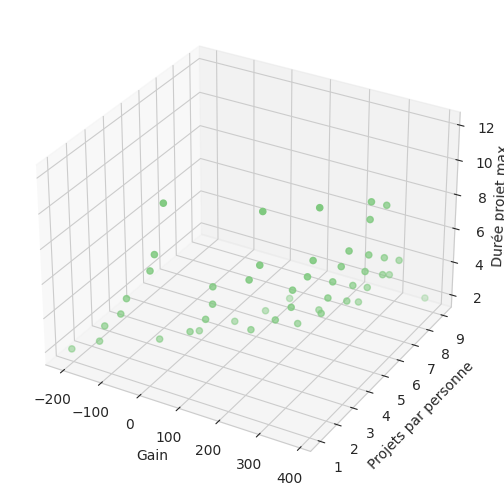

In [81]:
show_3d(s)

## Echantillon

Sélection aléatoire d'un sous-echantillon de 10 solution non dominées.

In [157]:
subset_size = 10
#subset = np.random.choice(s.shape[0], subset_size, replace=False)

Visualisation de cette echantillon

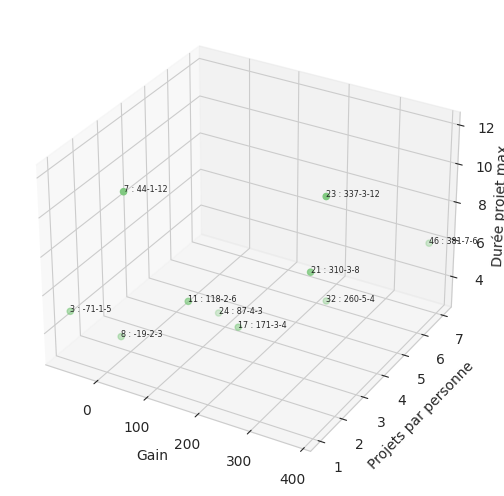

In [186]:
#
s_i = np.append(s.copy(), np.reshape(np.arange(s.shape[0]), (-1,1)), axis=1)
s_i[subset, :]

to_show = list(map(lambda a : str(a[3]) + ' : ' + str(a[0]) + '-' + str(a[1]) + '-' + str(a[2]),  s_i[subset, :]))
show_3d(s_i[subset,:-1], point=True, score=to_show)


Classement des solutions de cette échantillon par ordre de préférence

In [161]:
order = [23, 46, 21, 32, 17, 11, 24, 3, 8, 7]
score = [100, 95, 95, 75, 65, 30, 20, 19, -5, -20]

## Modèle Linéaire

Standardiser les données

In [162]:
X = s[order]
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = score

Entraînement du modèle linéaire

In [163]:
mlp = MLPRegressor((), activation='identity', max_iter=10000, solver='adam', learning_rate='constant', learning_rate_init=0.01)
mlp.fit(X, y)
print(mlp.score(X, y))

0.8960304745775367


/home/rulli/Documents/Cours/SDP/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Visualisation des coefficients explicatifs

In [232]:
print(f"Standard Scaler : ( [x1, x2, x3]  - {list(scaler.mean_)} ) % {list(np.round(scaler.var_, 2))}")
print(f"Modèle linéaire : Score = Gain x {mlp.coefs_[0][0][0]:.2f} + n_projets x {mlp.coefs_[0][1][0]:.2f} + Durée_projet_max x {mlp.coefs_[0][2][0]:.2f} + {mlp.intercepts_[0][0]:.2f}")

Standard Scaler : ( [x1, x2, x3]  - [161.8, 3.1, 6.3] ) % [21870.96, 3.09, 10.21]
Modèle linéaire : Score = Gain x 56.17 + n_projets x -18.22 + Durée_projet_max x -15.83 + 47.40


## Inférences

Scores prédis pour toute la surface de Pareto (Graph3D)

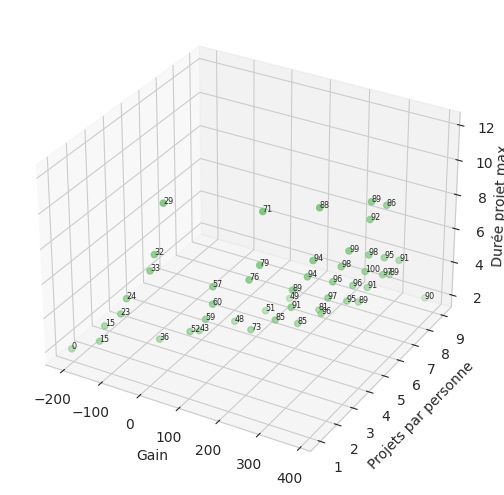

In [179]:
score_predicted = mlp.predict(scaler.transform(s))
score_predicted = (score_predicted - np.min(score_predicted) )/ (np.max(score_predicted - np.min(score_predicted)))
score_predicted *= 100
score_predicted = score_predicted.astype(int)
show_3d(s_i[:,:-1], point=True, score=score_predicted)

Score prédis pour toutes la surface de Pareto (Tableau)

In [190]:
s_i = np.append(s_i.copy(), np.reshape(score_predicted, (-1,1)), axis=1)
df = pd.DataFrame(s_i[:, [0,1,2,4]], columns=['Gain', 'n projets', 'projet max', 'score'])
df.sort_values(by=['score'], ascending=False)

,Gain,n projets,projet max,score
35,372,5,7,100
30,370,4,9,99
36,380,5,8,98
29,352,4,8,98
27,321,4,6,97
42,378,6,6,97
26,305,4,5,96
34,343,5,6,96
28,332,4,7,96
33,329,5,5,95
